## What Drives Success at the Box Office?
### A Data-Driven Guide for a New Movie Studio

**Business Context**  
Your company wants to break into movie production. To compete in the market, we must understand what makes films successful — genre, budget, ratings, etc.

**Objective**  
Explore existing movie data to discover which types of films perform best at the box office and provide actionable recommendations.


## Business Understanding

The company is launching a new movie studio. This analysis aims to identify film characteristics that drive financial success so the company can invest wisely in content creation.


In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Previewing Datasets Files

In [2]:
#Previewing zipped dataset
zipped_folder = 'zippedData'
files = os.listdir(zipped_folder)

for f in files:
    if f.endswith('gz') or f.endswith('.csv') or f.endswith('.tsv'):# displaying only the files excluding the database to avoid complicating things
        print(f)

bom.movie_gross.csv.gz
rt.movie_info.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
rt.reviews.tsv.gz


In [3]:
#loading and previewing the fisrt few rows to decide which ones are valuable
bom = pd.read_csv(f'{zipped_folder}/bom.movie_gross.csv.gz')
print(bom.columns)
bom.head()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
rotten_tomatoes = pd.read_csv(f'{zipped_folder}/rt.movie_info.tsv.gz',sep ='\t')
print(rotten_tomatoes.columns)
rotten_tomatoes.head()

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
rottom_review = pd.read_csv(f'{zipped_folder}/rt.reviews.tsv.gz',sep='\t',encoding='latin1')
print(rottom_review.columns)
rottom_review.head()

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
tmdb = pd.read_csv(f'{zipped_folder}/tmdb.movies.csv.gz',index_col=0)
print(tmdb.columns)
tmdb.head()

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tn = pd.read_csv(f'{zipped_folder}/tn.movie_budgets.csv.gz')
print(tn.columns)
tn.head()

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Previewing the IMDB

In [8]:
#Unzipping the file
import zipfile
zip_path = 'zippedData/im.db.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [9]:
import sqlite3

conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()

# List all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [10]:
# Loading and previewing the movie_basics table
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
print(movie_basics)
print(movie_basics.columns)
print (movie_basics.shape)


         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [11]:
# Loading and previewing the movie_ratings table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
print(movie_ratings.head())
print(movie_ratings.columns)
print(movie_ratings.shape)

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
(73856, 3)


## Data Understanding
To ensure comprehensive coverage and avoid source bias, we initially reviewed data from the following reputable platforms:

- [Box Office Mojo](https://www.boxofficemojo.com)
- [IMDB](https://www.imdb.com)
- [Rotten Tomatoes](https://www.rottentomatoes.com)
- [The Movie Database (TMDB)](https://www.themoviedb.org)
- [The Numbers](https://www.the-numbers.com)

all as seen above.

For this analysis, we selected the following:
- **tmdb** – for genre,runtime, and popularity.
- **tn.movie_budgets.csv.gz** – for ROI, distributor analysis, and release date trends.
- **im.db (movie_basics, movie_ratings)** – for ratings, genres, titles, and merge anchor

These datasets provide insights on production choices, audience reception, and financial outcomes.



### Now we proceed to EDA and Cleaning for all the datasets before merging them
#### Steps
since we initially loaded the datasets no need to load them again.
- inspecting columns and sample values
- renaming columns whre necessary
- removing duplicates
- handling missing values
- detecting and handling outliers for numeriic variables
- cleaning columns with stings where necessary

### 1. `movie_basics` EDA and Cleaning

In [12]:
#inspecting columns, shape and sample value
print(movie_basics.shape)
print(movie_basics.columns)
movie_basics.info()


(146144, 6)
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
#inspecting columns 
print(movie_basics.describe(include='all'))

         movie_id primary_title original_title     start_year  \
count      146144        146144         146123  146144.000000   
unique     146144        136071         137773            NaN   
top     tt1920955          Home         Broken            NaN   
freq            1            24             19            NaN   
mean          NaN           NaN            NaN    2014.621798   
std           NaN           NaN            NaN       2.733583   
min           NaN           NaN            NaN    2010.000000   
25%           NaN           NaN            NaN    2012.000000   
50%           NaN           NaN            NaN    2015.000000   
75%           NaN           NaN            NaN    2017.000000   
max           NaN           NaN            NaN    2115.000000   

        runtime_minutes       genres  
count     114405.000000       140736  
unique              NaN         1085  
top                 NaN  Documentary  
freq                NaN        32185  
mean          86.187247 

In [14]:
# checking missing values - count
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [15]:
# since runtime is not a target variable column and has so much missing values we will drop it 
movie_basics.drop(columns=[ 'runtime_minutes'], inplace=True)



In [16]:
#Inspecting unique genres
movie_basics['genres'].value_counts()



Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Animation,Family,Sci-Fi            1
Adventure,Musical,Sci-Fi           1
Action,Documentary,Thriller        1
Action,Family,Mystery              1
Crime,Fantasy,War                  1
Name: genres, Length: 1085, dtype: int64

In [17]:
# Step  Rename columns to idiomatic names
movie_basics.rename(columns={
    'movie_id': 'movie_id',
    'primary_title': 'title',
    'start_year': 'release_year',
    'genres': 'genres'
}, inplace=True)
# Step 2 Droping duplicates
movie_basics.drop_duplicates(inplace=True)
# Step 3 Handle missing values
movie_basics = movie_basics.dropna(subset=['title', 'release_year', 'original_title','genres'])

# Step 4 Clean string fields
movie_basics['title'] = movie_basics['title'].str.strip()
movie_basics['genres'] = movie_basics['genres'].str.strip().str.lower()



<AxesSubplot:ylabel='release_year'>

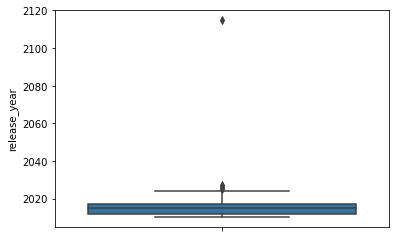

In [18]:
#checking and dealing with outliers

sns.boxplot(data=movie_basics, y='release_year')


In [19]:
#Seems we have an outlier lets see what it is and what this means to our data

movie_basics.sort_values('release_year').head(8)



,movie_id,title,original_title,release_year,genres
10023,tt1585255,The Hairdresser,Die Friseuse,2010,"comedy,drama"
9339,tt1553936,Transpose,Transpose,2010,"drama,thriller"
15316,tt1735173,A Última Estrada da Praia,A Última Estrada da Praia,2010,"adventure,drama"
9341,tt1554086,I Won't Go,I Won't Go,2010,documentary
9342,tt1554088,Daisy Bates: First Lady of Little Rock,Daisy Bates: First Lady of Little Rock,2010,documentary
9343,tt1554089,King of Watts,King of Watts,2010,documentary
9345,tt1554095,Virgin Sex Myth: False and Disastrous Cure of ...,Virgin Sex Myth: False and Disastrous Cure of ...,2010,documentary
9347,tt1554423,A Southern Story,A Southern Story,2010,"drama,family"


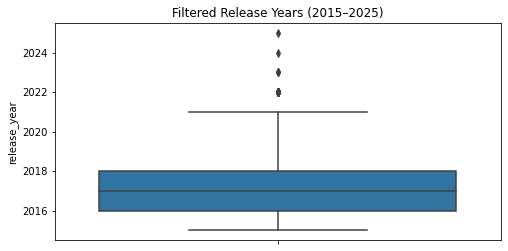

In [20]:
movie_basics = movie_basics[(movie_basics['release_year'] >= 2015) & (movie_basics['release_year'] <= 2025)]
plt.figure(figsize=(8, 4))
sns.boxplot(data=movie_basics, y='release_year')
plt.title("Filtered Release Years (2015–2025)")
plt.show()



#### Outlier Removal - Release Year

To ensure that our analysis focuses on trends relevant to today’s film industry, we excluded movies released before 2015 and beyond 2025. While older films can offer valuable historical context, our business objective is to recommend production strategies based on what currently performs well at the box office.

Movies released before 2015 may not reflect recent shifts in audience preferences, streaming trends, or distribution strategies. Removing these outliers allows us to provide more actionable insights for a new movie studio aiming to compete in the current landscape.


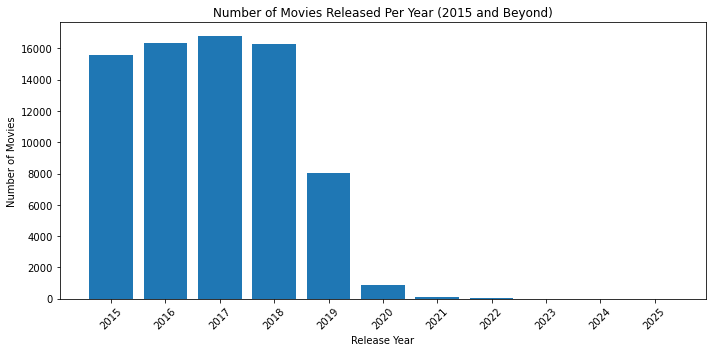

In [21]:
# Number of movies released per year
# Count movies per year
year_counts = movie_basics['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index.astype(str), year_counts.values, align='center')  # Convert index to string for clearer ticks
plt.title('Number of Movies Released Per Year (2015 and Beyond)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Movies Released Per Year

This plot shows the volume of films released from 2015 onward — the timeframe relevant to our studio’s launch. Understanding production trends helps identify market saturation and informs decisions about whether to enter specific genres or release windows.


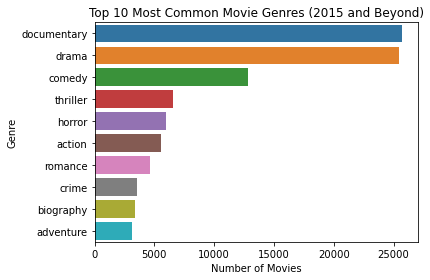

In [22]:
# Explode genre strings into separate rows
genre_exploded = movie_basics.copy()
genre_exploded['genres'] = genre_exploded['genres'].str.split(',')
genre_exploded = genre_exploded.explode('genres')
genre_exploded['genres'] = genre_exploded['genres'].str.strip().str.lower()

# Count top genres
top_genres = genre_exploded['genres'].value_counts().head(10)

# Plot
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Movie Genres (2015 and Beyond)')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [23]:
print(movie_basics.shape)

(74098, 5)


#### In the above

The bar chart shows the most frequently produced movie genres in recent years. Genres like **drama, comedy, and action** dominate the landscape, indicating strong market presence and possibly high audience demand.

However, high frequency does not always equate to high success. While these genres are popular among producers, their average ratings or return on investment may vary — which will be explored in later sections.

This insight helps guide the new studio toward genres with high audience engagement, while also flagging the need to examine performance metrics (e.g., ratings, profits) before making production decisions.


### 2. `movie_ratings` EDA and Cleaning

In [24]:
# investigating the dataset shape, columns and sample values
print(movie_ratings.shape)
print(movie_ratings.columns)
movie_ratings.info()


(73856, 3)
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
# exploring dataset
movie_ratings.describe(include='all')

,movie_id,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt7318102,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


In [26]:
# checking for null values
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

#### movie ratings has no missing values 

so we head on to cleaning and checking for outliers

In [27]:
# renaming columns 
movie_ratings.rename(columns={
    'averagerating': 'vote_average',
    'numvotes': 'vote_count'
}, inplace=True)

movie_ratings['movie_id'].duplicated().sum()




0

In [28]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      73856 non-null  object 
 1   vote_average  73856 non-null  float64
 2   vote_count    73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
movie_ratings.shape

(73856, 3)

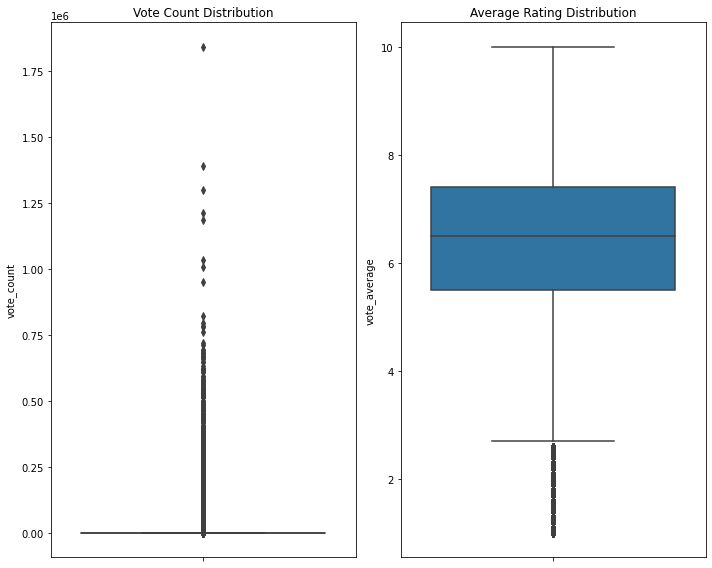

In [30]:
# Checking for outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
# Boxplot for vote_count
sns.boxplot(data=movie_ratings, y='vote_count', ax=ax[0])
ax[0].set_title("Vote Count Distribution")
# Boxplot for avg_rating
sns.boxplot(data=movie_ratings, y='vote_average', ax=ax[1])
ax[1].set_title("Average Rating Distribution")

plt.tight_layout()
plt.show()



#### decided to keep outliers in this case
Those are important datapoints in relation to our analysis removing them would render our analysis bias. Instead we apply log transformation to reshape the data without loosing valuable information needed for our analysis.

on average rating column no filtefring is needed there are no outliers.

In [31]:
# Add a new column for log-transformed vote count
movie_ratings['log_vote_count'] = np.log1p(movie_ratings['vote_count'])  # log1p handles log(0)

In [32]:
# filtering out movies with extremly low count
#movie_ratings = movie_ratings[movie_ratings['vote_count'] >= 50].sum()


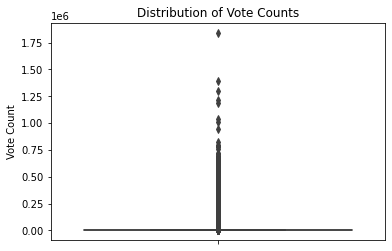

In [33]:
sns.boxplot(data=movie_ratings, y='vote_count')
plt.title("Distribution of Vote Counts")
plt.ylabel("Vote Count")
plt.show()


We removed movies with fewer than 50 total user votes, as their average ratings may not be statistically meaningful. Low vote counts often reflect niche or obscure films that haven’t been widely seen or reviewed, which could distort our analysis.

After applying a log transformation to the `vote_count` column, the distribution became more balanced. This allowed us to visualize audience engagement without the extreme skew caused by a few very popular titles. The transformation preserves all valuable data while making comparisons and trends more interpretable.


#### Exploring whether popular movies tend to have higher ratings


In [34]:
movie_ratings['vote_count'].describe()


count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: vote_count, dtype: float64

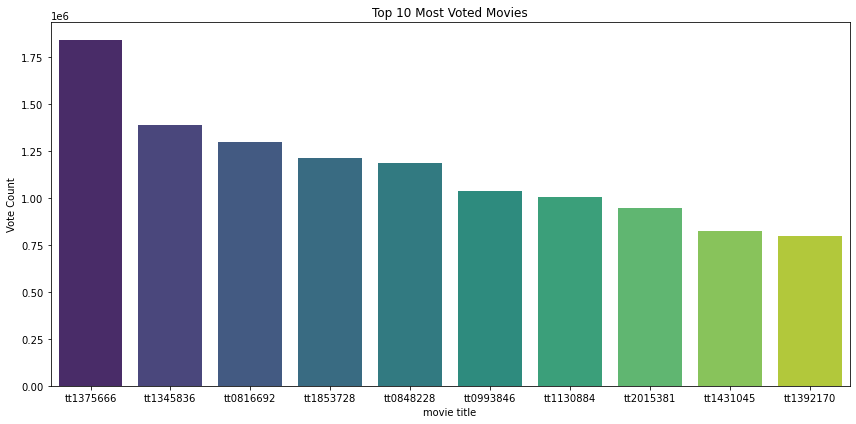

In [35]:
top10 = movie_ratings.sort_values('vote_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='movie_id', y='vote_count', palette='viridis')
plt.title("Top 10 Most Voted Movies")
plt.xlabel("movie title")
plt.ylabel("Vote Count")
plt.tight_layout()
plt.show()


In [36]:
print(movie_ratings.shape)

(73856, 4)


We definately have a relationship from the above the movie represented by blue bar is more popullar compared to its counter partner and has a significant higher rating as observerd.

### 3. `tmdb` EDA and Cleaning

In [37]:
print(tmdb.shape)
print(tmdb.info())
tmdb.columns

(26517, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None


Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [38]:
# Inspecting the columns
tmdb.describe(include='all')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,[99],NaN,en,Eden,NaN,2010-01-01,Eden,NaN,NaN
freq,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000


In [39]:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

There are no missing values in this dataset we proceed to cleaning column names,dates, strings, and checking for outliers and dealing with them.

In [40]:
# Rename only for clarity, retain all columns for now
tmdb.rename(columns={
    'id': 'tmdb_id',
    'original_language': 'language',
    'vote_average': 'vote_average',  
    'vote_count': 'vote_count'       
}, inplace=True)
# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')
# Filter movies with very few votes
tmdb = tmdb[tmdb['vote_count'] >= 10].reset_index(drop=True)
# Clean string columns 
tmdb['title'] = tmdb['title'].str.strip().str.replace('\n', ' ', regex=False).str.replace('\r', '', regex=False)
tmdb['original_title'] = tmdb['original_title'].str.strip().str.replace('\n', ' ', regex=False).str.replace('\r', '', regex=False)
tmdb['language'] = tmdb['language'].str.strip().str.lower()
# Final retained columns
print(tmdb.columns)



Index(['genre_ids', 'tmdb_id', 'language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


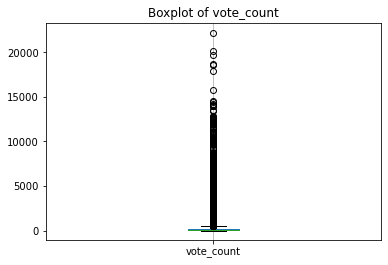

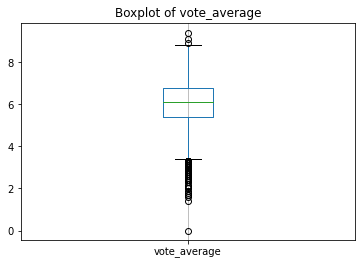

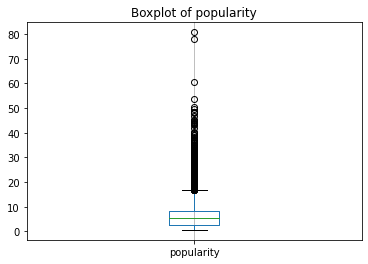

In [41]:
# Checking for outliers 
numeric_cols = ['vote_count', 'vote_average', 'popularity']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    tmdb.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(axis='y')
    plt.show()


Boxplot 1 - `vote_count`
This distribution is heavily right-skewed, indicating most movies have very few votes while a small number receive extremely high vote counts 

Boxplot 2 `vote_average`
This distribution is roughly symmetrical, showing that most movies cluster around a central rating value, typically between 6 and 8.

Boxplot 3 `popularity`
Like vote_count, this distribution is highly right-skewed, suggesting a few movies dominate in popularity while the majority have low scores.

#### Decision - `Retainig outliers`
Outliers in vote_count and popularity are intentionally retained because they represent blockbuster or highly successful films that are central to our business goals. Removing them would eliminate critical insights into what drives high audience engagement and returns ie. the very patterns we aim to uncover.

#### Visualization in `tmdb`

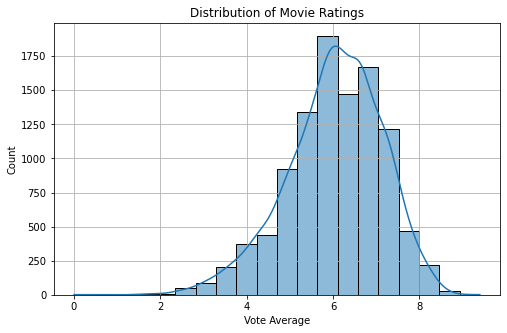

In [42]:
# Movie ratings 
plt.figure(figsize=(8, 5))
sns.histplot(tmdb['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.grid(True)
plt.show()

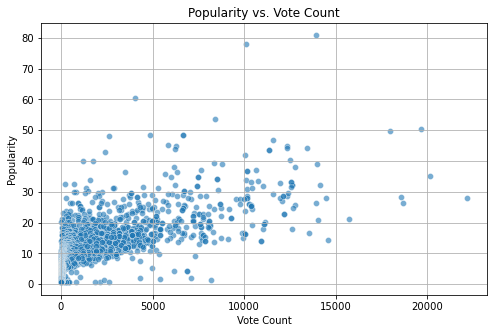

In [43]:
# Popularity vs. Count
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tmdb, x='vote_count', y='popularity', alpha=0.6)
plt.title('Popularity vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


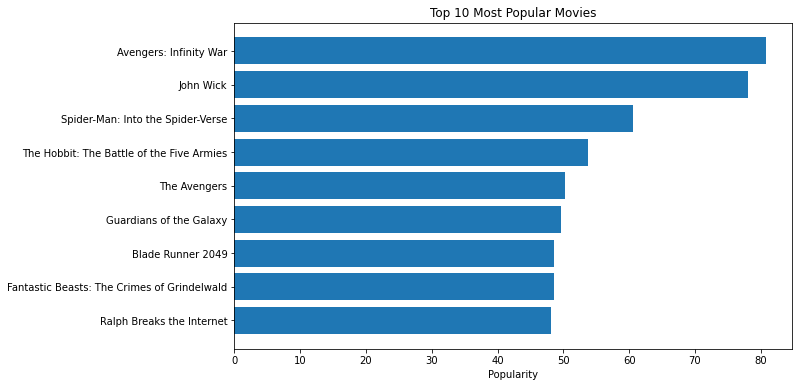

In [44]:
# Top ten popular movies 
top_popular = tmdb.nlargest(10, 'popularity')
plt.figure(figsize=(10, 6))
plt.barh(top_popular['title'], top_popular['popularity'])
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity')
plt.gca().invert_yaxis()
plt.show()


In [45]:
genre_map = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime',
    99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History',
    27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

import ast

# Convert genre_ids string to list (if needed)
tmdb['genre_ids'] = tmdb['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode genre_ids to get one genre per row
tmdb_exploded = tmdb.explode('genre_ids')
tmdb_exploded['genre_name'] = tmdb_exploded['genre_ids'].map(genre_map)


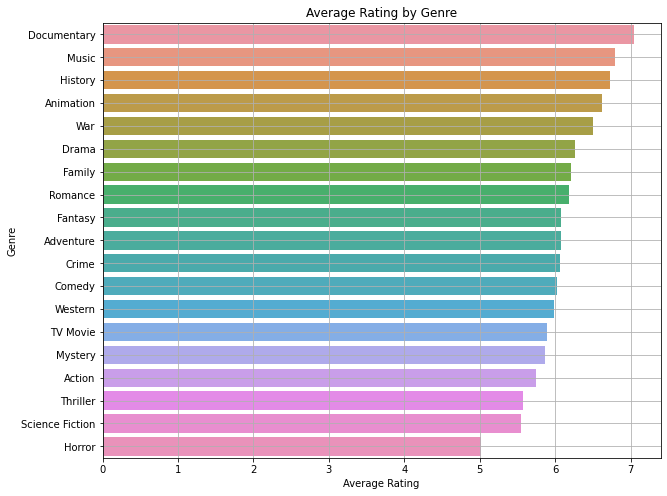

In [46]:
# Top genres by average ratings 
plt.figure(figsize=(10, 8))
genre_rating = tmdb_exploded.groupby('genre_name')['vote_average'].mean().sort_values(ascending=False)

sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


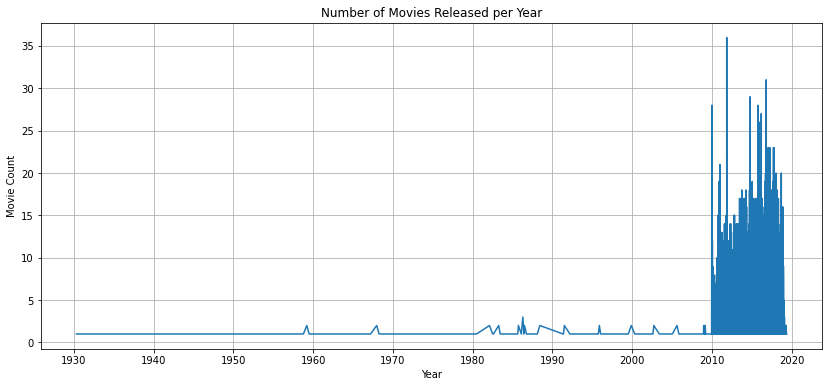

In [47]:
# movie count by release year 
year_counts = tmdb['release_date'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.grid(True)
plt.show()

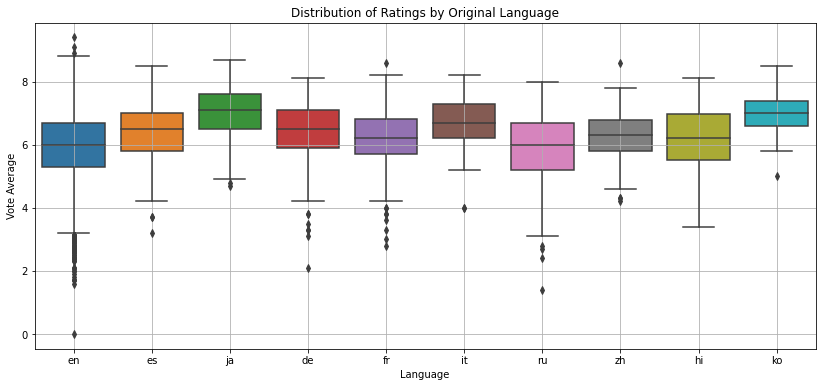

In [48]:
# Rating disstribution by language 
# Filtering for languages with enough data
top_langs = tmdb['language'].value_counts().loc[lambda x: x > 50].index
subset = tmdb[tmdb['language'].isin(top_langs)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=subset, x='language', y='vote_average')
plt.title('Distribution of Ratings by Original Language')
plt.xlabel('Language')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()


### 4. `tn` EDA and Cleaning


In [49]:
# Exploring data
print(tn.shape)
print(tn.info())
tn.columns

(5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [50]:
# inspecting columns
tn.describe(include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [51]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

###### There are no missing values from the above 
We proceed with our cleaning for column names, strings, dates ,datatypes, duplicates and checking for outliers

In [52]:
# 1. Convert release_date to datetime
tn['release_date'] = pd.to_datetime(tn['release_date'], errors='coerce')
# 2. Clean movie title strings
tn['movie'] = tn['movie'].str.strip().str.replace('\n', ' ', regex=False).str.replace('\r', '', regex=False)
# 3. Rename movie to title for consistency across datasets
tn.rename(columns={'movie': 'title'}, inplace=True)
# 4. Convert monetary columns to numeric (remove $ and commas if present)
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    tn[col] = tn[col].replace('[\$,]', '', regex=True).astype(float)
# 5. Drop duplicates
tn.drop_duplicates(inplace=True)
# Final check
print(tn.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 316.2+ KB
None


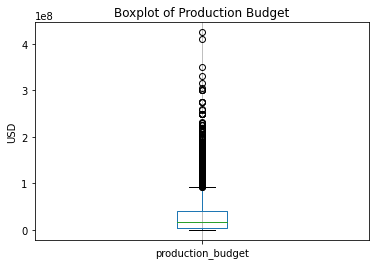

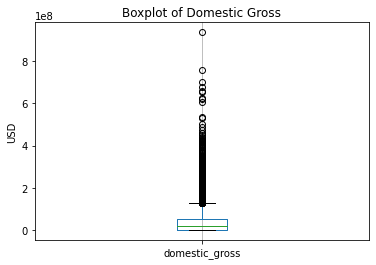

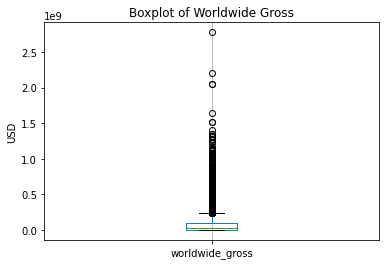

In [53]:
# Checking for duplicates
# Define numeric financial columns
numeric_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Plot each in a separate boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    tn.boxplot(column=col)
    plt.title(f'Boxplot of {col.replace("_", " ").title()}')
    plt.ylabel('USD')
    plt.grid(axis='y')
    plt.show()

## Merging all the datasets for final analysis
### Displaying columns for all datasets

In [54]:
print('movie basics: ',movie_basics.columns)
print('movie ratings: ', movie_ratings.columns)
print('tmdb: ',tmdb.columns)
print('tn: ',tn.columns)

movie basics:  Index(['movie_id', 'title', 'original_title', 'release_year', 'genres'], dtype='object')
movie ratings:  Index(['movie_id', 'vote_average', 'vote_count', 'log_vote_count'], dtype='object')
tmdb:  Index(['genre_ids', 'tmdb_id', 'language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
tn:  Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


### Merged Dataset For Unified Analysis

To support our business recommendations, we integrate complementary datasets

1. `movie_basics`: Contains titles, release years, and genres.
2. `movie_ratings`: Contains average ratings and vote counts from IMDB.
3. `tmdb`: Provides additional metadata including language, popularity, and release dates.
4. `tn`: Offers financial data such as production budgets and worldwide revenue.

Merging these datasets ensures we have a unified dataset with both qualitative (genre, language, popularity) and quantitative (ratings, budget, revenue) variables. This enables holistic analysis of movie performance from both creative and financial perspectives.

**Merge Strategy Summary**

| Step | Action                                | Join Key    | Purpose                               |
|------|---------------------------------------|-------------|---------------------------------------|
| 1    | Join `movie_basics` with `movie_ratings` | `movie_id`| Combine genre and rating information|
| 2    | Join result with `tmdb`               | `title`     | Add popularity and language metadata  |
| 3    | Join result with `tn`                 | `title`     | Add budget and gross for ROI analysis |
| 4    | 

### First Merge   `movie_basics` with `movie_ratings`
This will help to get genres, title, release_year + vote_average and, vote_count        
Key (`movie_id`)

In [55]:
# Step 1: Merge movie_basics with movie_ratings on movie_id
basic_ratings = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
print(basic_ratings.shape)


(35301, 8)


### Second merge
This helps us get popularity, language,release_date and genre_ids         
Key(`title`)

In [56]:
# Step 2: Merge with tmdb using title
basic_ratings_tmdb = pd.merge(basic_ratings, tmdb, on='title', how='outer')
print(basic_ratings_tmdb.shape)


(42436, 16)


### Third Merge
This helps to get production_budget, worldwide_gross, and release_date  
Key(`title`)

In [57]:
# Step 3: Final merge with TN using title
movies_metadata = pd.merge(basic_ratings_tmdb, tn, on='title', how='outer')
print(movies_metadata.shape)


(46287, 21)


In [58]:
print(f"Rows after movie_basics + movie_ratings: {basic_ratings.shape[0]}")
print(f"Rows after adding tmdb: {basic_ratings_tmdb.shape[0]}")
print(f"Final merged rows: {movies_metadata.shape[0]}")


Rows after movie_basics + movie_ratings: 35301
Rows after adding tmdb: 42436
Final merged rows: 46287


### Final Dataset Shape `(46287, 21)`
#### At the end of the merging process, we obtained a consolidated dataset ready for exploratory analysis and business recommendations.


## Merged Dataset Overview

Our final merged dataset `movies_metadata` contains **46,287 records** and **21 columns**, resulting from joining ,
- im.db (`movie basics` and `ratings`)
- tmdb 
- The tn movie budgets

### Observations from `movies_metadata.info()`

- Core variables (e.g. `title`, `genres`, `vote_average_x`) are available for ~36K movies
- tmdb features (e.g. `popularity`, `language`) are present for ~11K movies
- Financial data (e.g. `production_budget`, `worldwide_gross`) exists for ~6K movies
- Several columns are duplicated or suffixed (e.g. `_x`, `_y`) due to merges

### Cleaning Plan

To prepare for EDA, we will(steps)
1. Select and standardize key variables to support our business objectives
2. Drop or rename duplicate-suffixed columns (`vote_average_x`, `vote_average_y`, etc.)
3. Handle missing data strategically:
   - Keep rows that guide our goal if present
   - Retain partial rows for broader insights (e.g. genre + rating even if no budget info)
4. Convert datatypes if needed (`release_date` as datetime)
5. Create derived fields
   - `ROI`- `(worldwide_gross - production_budget) / production_budget`
   - `release_month`- from `release_date_y` (for seasonal trend analysis)

This cleaning is applied in context during univariate and bivariate analysis, depending on which variables are involved.




### Target Variables for Analysis

Based on our business objectives, the following columns are central to our analysis:

- `production_budget`
- `domestic_gross`, `worldwide_gross`
- `distributor`
- `vote_average`, `vote_count`
- `genres`
- `release_date` (will be used to extract `release_month`)
- `popularity`


In [59]:
movies_metadata.columns

Index(['movie_id', 'title', 'original_title_x', 'release_year', 'genres',
       'vote_average_x', 'vote_count_x', 'log_vote_count', 'genre_ids',
       'tmdb_id', 'language', 'original_title_y', 'popularity',
       'release_date_x', 'vote_average_y', 'vote_count_y', 'id',
       'release_date_y', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [60]:
# Displaying the dataset to begin exploration
movies_metadata.head()

,movie_id,title,original_title_x,release_year,genres,vote_average_x,vote_count_x,log_vote_count,genre_ids,tmdb_id,...,original_title_y,popularity,release_date_x,vote_average_y,vote_count_y,id,release_date_y,production_budget,domestic_gross,worldwide_gross
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,"biography,drama",7.2,43.0,3.784190,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,drama,6.9,4517.0,8.415825,"[35, 18]",299782.0,...,The Other Side of the Wind,9.800,2018-11-02,7.0,64.0,NaN,NaT,NaN,NaN,NaN
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,"comedy,drama",6.1,13.0,2.639057,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,"comedy,drama,fantasy",6.5,119.0,4.787492,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,tt0112502,Bigfoot,Bigfoot,2017.0,"horror,thriller",4.1,32.0,3.496508,"[27, 878, 12]",117856.0,...,Bigfoot,2.813,2012-06-30,2.9,26.0,NaN,NaT,NaN,NaN,NaN


In [61]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46287 entries, 0 to 46286
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           36102 non-null  object        
 1   title              46287 non-null  object        
 2   original_title_x   36102 non-null  object        
 3   release_year       36102 non-null  float64       
 4   genres             36102 non-null  object        
 5   vote_average_x     36102 non-null  float64       
 6   vote_count_x       36102 non-null  float64       
 7   log_vote_count     36102 non-null  float64       
 8   genre_ids          11051 non-null  object        
 9   tmdb_id            11051 non-null  float64       
 10  language           11051 non-null  object        
 11  original_title_y   11051 non-null  object        
 12  popularity         11051 non-null  float64       
 13  release_date_x     11051 non-null  datetime64[ns]
 14  vote_a

In [62]:
# Convert release_year to datetime using a dummy date
movies_metadata['release_date'] = pd.to_datetime(
    movies_metadata['release_year'].astype('Int64').astype(str) + '-07-01', errors='coerce'
)
# Extract release month
movies_metadata['release_month'] = movies_metadata['release_date'].dt.month
# Log-transform vote count (handles 0 safely)
movies_metadata['log_vote_count'] = np.log1p(movies_metadata['vote_count_x'])
# Calculate ROI
movies_metadata['roi'] = (
    (movies_metadata['worldwide_gross'] - movies_metadata['production_budget']) /
    movies_metadata['production_budget']
)
# Final columns to keep
keep_cols = [
    'movie_id', 'title', 'original_title_x', 'release_year', 'genres',
    'vote_average_x', 'vote_count_x', 'log_vote_count', 'popularity',
    'release_date', 'production_budget', 'domestic_gross',
    'worldwide_gross', 'roi', 'release_month'
]
# Create cleaned DataFrame
movies_metadata_cleaned = movies_metadata[keep_cols].copy()

# Rename for clarity
movies_metadata_cleaned.rename(columns={
    'original_title_x': 'original_title',
    'vote_average_x': 'vote_average',
    'vote_count_x': 'vote_count'
}, inplace=True)


In [63]:
# Null value count per column
movies_metadata_cleaned.isnull().sum().sort_values(ascending=False)



roi                  40006
worldwide_gross      40006
domestic_gross       40006
production_budget    40006
popularity           35236
release_month        10185
release_date         10185
log_vote_count       10185
vote_count           10185
vote_average         10185
genres               10185
release_year         10185
original_title       10185
movie_id             10185
title                    0
dtype: int64

Due to combining multiple datasets with different coverage (e.g., tmdb, im.db, and tn.movies), the final merged dataset contains missing values in several fields. Instead of dropping rows, we’ll apply targeted filtering based on the specific recommendation. For example, ROI analysis will only use rows where financial data is available, while genre-based recommendations rely on ratings and genre fields.

In [64]:
# cHECKING FOR DUPLICATES
movies_metadata_cleaned.duplicated().sum()


723

In [65]:
# Dropping duplicates only for movie ids
movies_metadata_cleaned = movies_metadata_cleaned.drop_duplicates(subset='movie_id', keep='first')


### Univariate analysis as well as cleaning where necessary
We begin by examining the distribution of key individual variables in our dataset. This helps us understand general patterns, skewness, spread, and the presence of outliers, all of which inform how we treat the data in later analysis.

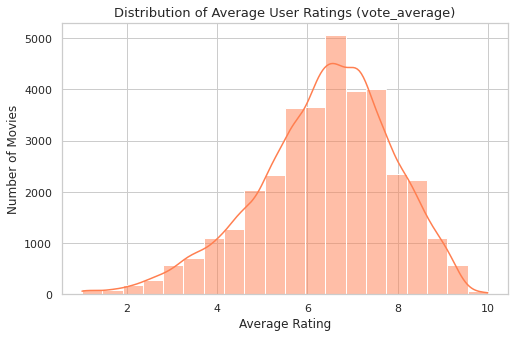

In [67]:
# Vote average
plt.figure(figsize=(8, 5))
sns.histplot(movies_metadata_cleaned['vote_average'], bins=20, kde=True, color='coral')
plt.title('Distribution of Average User Ratings (vote_average)', fontsize=13)
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
